In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/4th_kaggle/train.csv')
test = pd.read_csv('data/4th_kaggle/test.csv')
sub = pd.read_csv('data/4th_kaggle/sample_submission.csv')

In [3]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
test.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [5]:
sub.columns

Index(['id', 'prediction'], dtype='object')

In [6]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [7]:
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6512 non-null   int64 
 1   age             6512 non-null   int64 
 2   workclass       6512 non-null   object
 3   fnlwgt          6512 non-null   int64 
 4   education       6512 non-null   object
 5   education_num   6512 non-null   int64 
 6   marital_status  6512 non-null   object
 7   occupation      6512 non-null   object
 8   relationship    6512 non-null   object
 9   race            6512 non-null   object
 10  sex             6512 non-null   object
 11  capital_gain    6512 non-null   int64 
 12  capital_loss    6512 non-null   int64 
 13  hours_per_week  6512 non-null   int64 
 14  native_country  6512 non-null   object
dtypes: int64(7), object(8)
memory usage: 763.2+ KB


In [11]:
train.income.unique()

array(['>50K', '<=50K'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='count'>

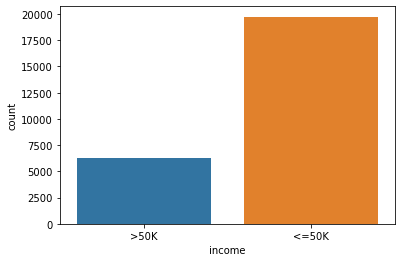

In [12]:
sns.countplot(x="income", data=train)

### 전처리

In [13]:
train.loc[ train['income']=='>50K' , 'target'] = 1
train.loc[ train['income']=='<=50K' , 'target'] = 0
train['target'] = train.target.astype("int")

In [14]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [15]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [16]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [17]:
sel = ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

X = train[sel]
y = train['target']

test_X = test[sel]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=train.target,
                                                   random_state=42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19536, 7) (6513, 7) (19536,) (6513,)


### Baseline 모델 만들기

In [19]:
# 로지스틱 모델
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(test_X)

In [20]:
sub.columns

Index(['id', 'prediction'], dtype='object')

In [21]:
print( sub.shape )
print( pred.shape )

(6512, 2)
(6512,)


In [22]:
sub['prediction'] = pred
sub.to_csv("first_Sub_4th.csv", index=False)

### Score: 0.78545